In [27]:
import yfinance as yf
import numpy as np
import ta
import pandas as pd
import matplotlib.pyplot as plt

# Loading Asset Data

In [28]:
df = yf.download('BTC-USD', start='2022-02-10', interval='15m')

[*********************100%***********************]  1 of 1 completed


In [29]:
df

,Open,High,Low,Close,Adj Close,Volume
Datetime,,,,,,
2022-02-09 13:00:00+00:00,44123.996094,44336.648438,44109.746094,44336.648438,44336.648438,3702784
2022-02-09 13:15:00+00:00,44335.632812,44371.847656,44254.617188,44254.617188,44254.617188,138008576
2022-02-09 13:30:00+00:00,44257.800781,44263.570312,44152.886719,44163.847656,44163.847656,37529600
2022-02-09 13:45:00+00:00,44168.714844,44205.894531,44023.250000,44023.250000,44023.250000,41517056
2022-02-09 14:00:00+00:00,44035.363281,44035.363281,43887.265625,43964.222656,43964.222656,83402752
...,...,...,...,...,...,...
2022-02-15 04:15:00+00:00,43569.589844,43586.250000,43546.527344,43586.250000,43586.250000,33863680
2022-02-15 04:30:00+00:00,43573.089844,43573.089844,43528.921875,43542.070312,43542.070312,38789120
2022-02-15 04:45:00+00:00,43540.425781,43542.890625,43496.019531,43507.281250,43507.281250,41115648


# Create your Indicators

In [30]:
df['Stoch'] = ta.momentum.StochasticOscillator(df.High,df.Low,df.Close, window=14, smooth_window=7).stoch_signal()

In [31]:
df['Stoch']

Datetime
2022-02-09 13:00:00+00:00          NaN
2022-02-09 13:15:00+00:00          NaN
2022-02-09 13:30:00+00:00          NaN
2022-02-09 13:45:00+00:00          NaN
2022-02-09 14:00:00+00:00          NaN
                               ...    
2022-02-15 04:15:00+00:00    95.952326
2022-02-15 04:30:00+00:00    94.929936
2022-02-15 04:45:00+00:00    93.042454
2022-02-15 05:00:00+00:00    81.720348
2022-02-15 05:10:00+00:00    69.447429
Name: Stoch, Length: 546, dtype: float64

In [32]:
df['UpBB'] = ta.volatility.BollingerBands(df.Close, window=20,window_dev=2).bollinger_hband()
df['LowBB'] = ta.volatility.BollingerBands(df.Close, window=20,window_dev=2).bollinger_lband()

# Clearing NAN

In [33]:
df.isna().sum()

Open          0
High          0
Low           0
Close         0
Adj Close     0
Volume        0
Stoch        19
UpBB         19
LowBB        19
dtype: int64

In [34]:
df.head()

,Open,High,Low,Close,Adj Close,Volume,Stoch,UpBB,LowBB
Datetime,,,,,,,,,
2022-02-09 13:00:00+00:00,44123.996094,44336.648438,44109.746094,44336.648438,44336.648438,3702784,NaN,NaN,NaN
2022-02-09 13:15:00+00:00,44335.632812,44371.847656,44254.617188,44254.617188,44254.617188,138008576,NaN,NaN,NaN
2022-02-09 13:30:00+00:00,44257.800781,44263.570312,44152.886719,44163.847656,44163.847656,37529600,NaN,NaN,NaN
2022-02-09 13:45:00+00:00,44168.714844,44205.894531,44023.250000,44023.250000,44023.250000,41517056,NaN,NaN,NaN
2022-02-09 14:00:00+00:00,44035.363281,44035.363281,43887.265625,43964.222656,43964.222656,83402752,NaN,NaN,NaN


In [35]:
df.dropna(inplace=True)

In [36]:
df['No'] = range(len(df))

# Condition(s)

### Stoch Trigger

In [57]:
# def gettriggers(df, buy=True):
#     dfx = pd.DataFrame()
#     for i in range(1,2):
#         if buy:
#             mask = (df.Stoch.shift(i) <= 10) & (df.Stoch > 10)
#         else:
#             mask = (df.Stoch.shift(i) >= 90) & (df.Stoch < 90)
        
#         dfx = dfx.append(mask, ignore_index=True)
#     return dfx.sum(axis=0)


def gettriggers(df, buy=True):
    dfx = pd.DataFrame()

    if buy:
        mask = (df.Stoch < 10)
    else:
        mask = (df.Stoch > 90)
        
    dfx = dfx.append(mask, ignore_index=True)
    return dfx.sum(axis=0)

In [58]:
# Buy Stoch Trigger
buystoch = np.where(gettriggers(df),1,0)

In [59]:
# Sell Stoch Trigger
sellstoch = np.where(gettriggers(df,buy=False),1,0)

buylist = list(df[df['Buy']==1].No)

for i in buylist:
    print(df.iloc[i].Close)
    buyprice = df.iloc[i].Close
    
    sl = buyprice - 1 * (buyprice/100)
    tp = buyprice + 2 * (buyprice/100)
    
    print('Stop:', sl)
    print('Take Profit:', tp)
    
    if 

## [ALL] Combined TRIGGERS

In [60]:
# Combined Buy Trigger
# Note: to add more conditions, just put '& ()' and insert condition
df['Buy'] = np.where(
    
    # INSERT CONDITIONS HERE
    (buystoch) 
    # END
    
,1,0)

df['Sell'] = np.where(
    
    # INSERT CONDITIONS HERE
    (sellstoch) 
    # END
    
,1,0)

# Capturing Buy/Sell Dates

In [61]:
BuyDates, SellDates = [],[]

In [62]:
# Recording the buy Dates and Sell dates provided we bought (not just generating triggers)
# Making buying dates on the period (open price) after signal was triggered


for i in range(len(df)-1): # For every row in df
    
    if df.Buy.iloc[i]: #If we bought
        BuyDates.append(df.iloc[i+1].name) # Record buy date
        for num,j in enumerate(df.Sell[i:]): # Find the nearest selling date AFTER the day we bought
            if j: # if we Sold
                SellDates.append(df.iloc[i + num + 1].name) # append date; plus 'num' because i was the day we bought 
                # and plus 1 because we realistically sell 1 day after it is triggered
                break

## Equalizing the dates

In [63]:
cutit = len(BuyDates) - len(SellDates)

In [64]:
if cutit:
    BuyDates = BuyDates[:-cutit]

In [65]:
frame = pd.DataFrame({'Buying_Dates':BuyDates, 'Selling_Dates':SellDates})

In [66]:
frame

,Buying_Dates,Selling_Dates
0,2022-02-10 01:00:00+00:00,2022-02-10 08:00:00+00:00
1,2022-02-10 01:15:00+00:00,2022-02-10 08:00:00+00:00
2,2022-02-10 01:30:00+00:00,2022-02-10 08:00:00+00:00
3,2022-02-10 20:30:00+00:00,2022-02-11 08:30:00+00:00
4,2022-02-10 20:45:00+00:00,2022-02-11 08:30:00+00:00
5,2022-02-10 21:00:00+00:00,2022-02-11 08:30:00+00:00
6,2022-02-10 21:15:00+00:00,2022-02-11 08:30:00+00:00
7,2022-02-10 21:30:00+00:00,2022-02-11 08:30:00+00:00
8,2022-02-10 22:00:00+00:00,2022-02-11 08:30:00+00:00
9,2022-02-10 22:15:00+00:00,2022-02-11 08:30:00+00:00


## Actual Dates

In [67]:
actuals = frame[frame.Buying_Dates > frame.Selling_Dates.shift(1)]

In [68]:
actuals

,Buying_Dates,Selling_Dates
3,2022-02-10 20:30:00+00:00,2022-02-11 08:30:00+00:00
12,2022-02-11 19:30:00+00:00,2022-02-12 10:00:00+00:00
13,2022-02-12 22:00:00+00:00,2022-02-14 08:00:00+00:00


# Profit Calculation

In [69]:
def profitcalc():
    Buyprices = df.loc[actuals.Buying_Dates].Open
    Sellprices = df.loc[actuals.Selling_Dates].Open
    return (Sellprices.values - Buyprices.values)/Buyprices.values


In [70]:
profits = profitcalc()
profits[:]

array([-0.01691534, -0.0020453 ,  0.00929969])

In [71]:
len(profits)

3

In [72]:
winsnum = len(profits[profits>0])
lossnum = len(profits[profits<0])
winrate = winsnum/len(profits)*100

print(len(profits),'Total')
print(winsnum,'Wins')
print(lossnum,'Losses')
print(winrate,'%')

3 Total
1 Wins
2 Losses
33.33333333333333 %


In [73]:
(profits+1).prod()

0.9901976388212869

## What profits did you get?

# Plotting


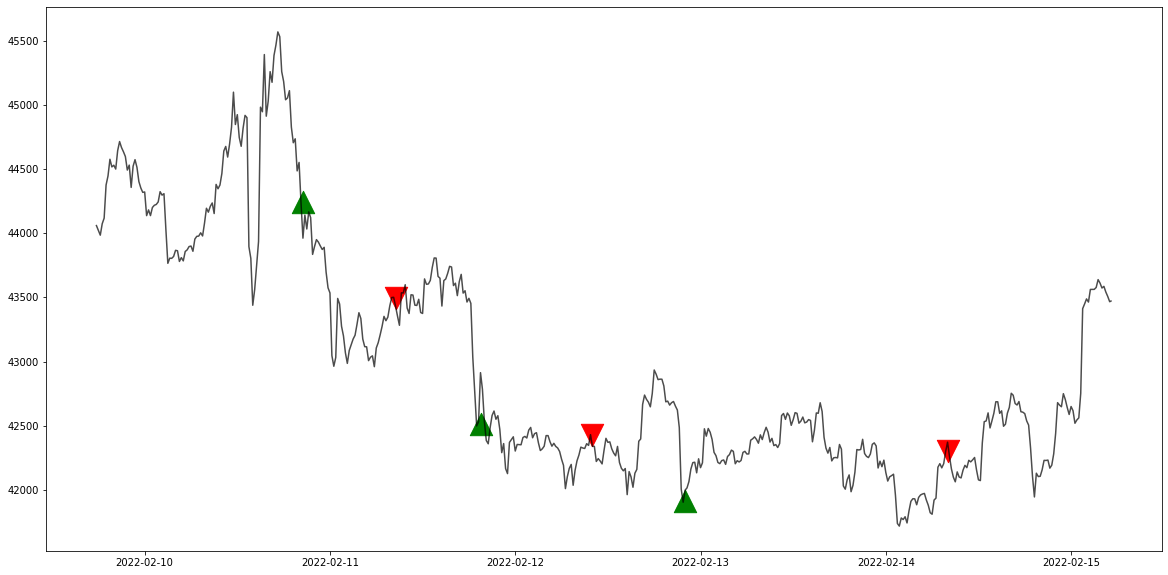

In [74]:
plt.figure(figsize=(20,10))
plt.plot(df.Close, color='k', alpha=0.7)
plt.scatter(actuals.Buying_Dates, df.Open[actuals.Buying_Dates], marker='^',color='g',s=500)
plt.scatter(actuals.Selling_Dates, df.Open[actuals.Selling_Dates], marker='v',color='r',s=500)
plt.show()

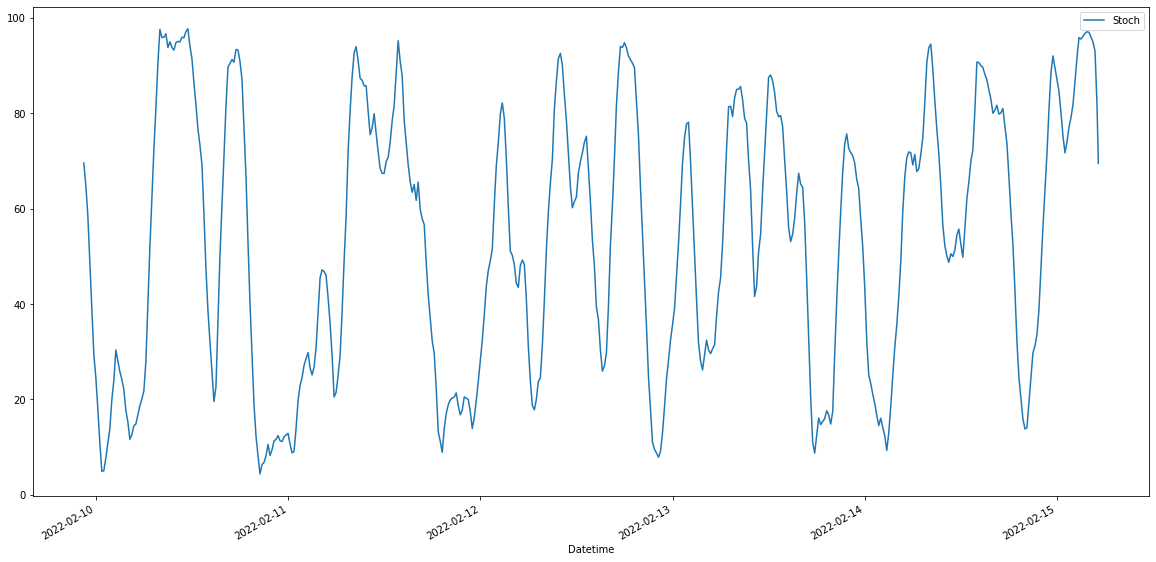

In [75]:
#df['Stoch'] = ta.momentum.StochasticOscillator(df.High,df.Low,df.Close, window=14, smooth_window=7).stoch_signal()

plt.figure(figsize=(20,10))
df.Stoch.plot()
#ta.momentum.StochasticOscillator(df.High,df.Low,df.Close, window=14, smooth_window=7).stoch().plot()
plt.legend()